<a href="https://colab.research.google.com/github/ansaalmns/test/blob/main/CLO2_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score


In [ ]:
#Load the dataset
df = pd.read_csv('Global_AI_Content_Impact_Dataset.csv')
df

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Germany,2021,Automotive,89.44,52.98,48.47,12.14,30.60,DALL-E,Lenient,77.21,44.35
196,Germany,2020,Media,70.11,28.26,27.62,57.86,58.71,DALL-E,Strict,78.74,31.73
197,France,2023,Marketing,65.77,49.83,39.94,79.44,43.73,Synthesia,Lenient,81.58,14.62
198,Australia,2023,Automotive,45.35,20.49,33.21,50.50,41.73,Claude,Strict,47.42,43.11


In [ ]:
#6.	Create a script to develop a Python function for descriptive statistics. The input for the function should be the sample and the field to perform the descriptive statistics.
def Desc_stat(ds, var):
    mean = ds[var].mean()
    median = ds[var].median()
    mode = ds[var].mode()[0]
    minimum = ds[var].min()
    maximum = ds[var].max()
    range_ = ds[var].max() - ds[var].min()
    std_dev = ds[var].std()
    variance = ds[var].var()
    skew = ds[var].skew()
    kurtosis = ds[var].kurt()
    count = ds[var].count()
    Quart = [
        ds[var].quantile(0),
        ds[var].quantile(0.25),
        ds[var].quantile(0.50),
        ds[var].quantile(0.75),
        ds[var].quantile(1),
        ds[var].quantile(0.75) - ds[var].quantile(0.25)
    ]

    summary = {
        "Average ": mean,
        "Median ": median,
        "Mode ": mode,
        "Minimum ": minimum,
        "Maximum ": maximum,
        "Range ": range_,
        "Std Dev ": std_dev,
        "Variance ": variance,
        "Skewness ": skew,
        "Kurtosis ": kurtosis,
        "Minimum ": Quart[0],
        "25th Pecentile ": Quart[1],
        "50th Pecentile ": Quart[2],
        "75th Pecentile ": Quart[3],
        "Maximum ": Quart[4],
        "Inter Quartile Range ": Quart[5],
        "Count ": count
    }

    return summary

In [ ]:
#7.	Create a program to random sampling of size 150 and find the descriptive statistics for the dependent variable from the sample Apply the descriptive function which you created. – create a sample of 150 observations
# random sampling (150)
sample_size = 150
sample = df.sample(n=sample_size, replace=False, random_state=42)
sample


# Apply the descriptive function which you created.
Desc_stat(sample,'Job Loss Due to AI (%)')

{'Average ': np.float64(25.683533333333333),
 'Median ': 25.545,
 'Mode ': np.float64(0.09),
 'Minimum ': np.float64(0.09),
 'Maximum ': np.float64(49.71),
 'Range ': 49.62,
 'Std Dev ': 14.173869574217731,
 'Variance ': 200.8985787069351,
 'Skewness ': np.float64(-0.006764484526611339),
 'Kurtosis ': np.float64(-1.0436268178471555),
 '25th Pecentile ': np.float64(14.6725),
 '50th Pecentile ': np.float64(25.545),
 '75th Pecentile ': np.float64(37.6075),
 'Inter Quartile Range ': np.float64(22.935000000000002),
 'Count ': np.int64(150)}

In [ ]:
#8.	Create a script for systematic sampling by giving certain conditions and finding the desc stat for the dependent variable from the sample [Apply the descriptive function which you created].


In [ ]:
#9.Create a detailed descriptive statistics report about the dependent variable of the chosen dataset.
Desc_stat(df,'Job Loss Due to AI (%)')

{'Average ': np.float64(25.788249999999998),
 'Median ': 25.735,
 'Mode ': np.float64(12.61),
 'Minimum ': np.float64(0.09),
 'Maximum ': np.float64(49.71),
 'Range ': 49.62,
 'Std Dev ': 13.901105138002116,
 'Variance ': 193.24072405778884,
 'Skewness ': np.float64(-0.040586919895167196),
 'Kurtosis ': np.float64(-1.0190075022472516),
 '25th Pecentile ': np.float64(14.995000000000001),
 '50th Pecentile ': np.float64(25.735),
 '75th Pecentile ': np.float64(37.417500000000004),
 'Inter Quartile Range ': np.float64(22.422500000000003),
 'Count ': np.int64(200)}

In [ ]:
#10. Visualize the dependent variable by the Graph/Chart of the following using Python Program:



In [ ]:
df['Job Loss Due to AI (%)'].skew()
#less than 0, the graph is negatively skewed with the majority of data values greater than mean.


np.float64(-0.040586919895167196)

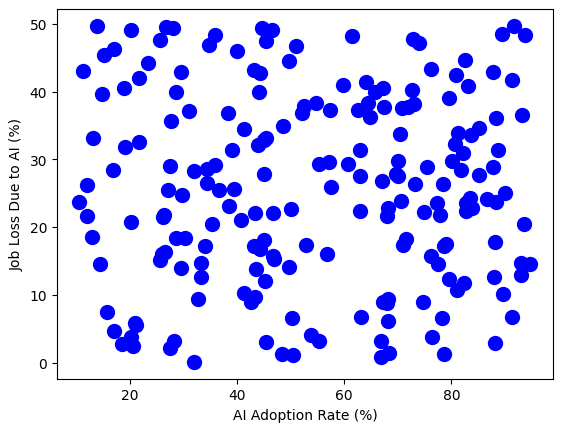

In [ ]:
#a.)Scatter plot
df.plot.scatter(x = 'AI Adoption Rate (%)', y = 'Job Loss Due to AI (%)', s = 100, c= 'blue');

<Axes: ylabel='Job Loss Due to AI (%)'>

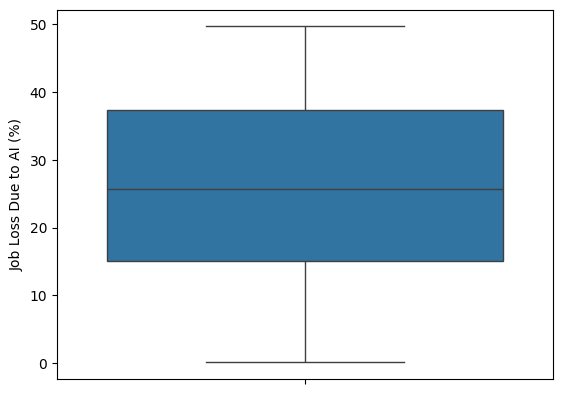

In [ ]:
#b.) Box Plot
sns.boxplot(df['Job Loss Due to AI (%)'])

Text(0.5, 1.0, 'Distribution of Job Loss Due to AI')

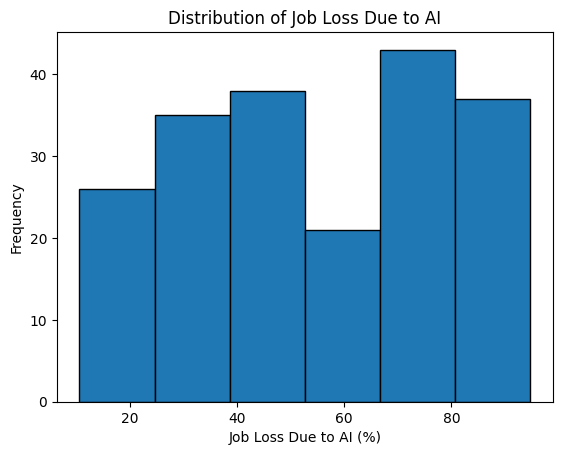

In [ ]:
#c.) Histogram
plt.hist(df['AI Adoption Rate (%)'], bins=6, edgecolor='black')

plt.xlabel('Job Loss Due to AI (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Job Loss Due to AI')

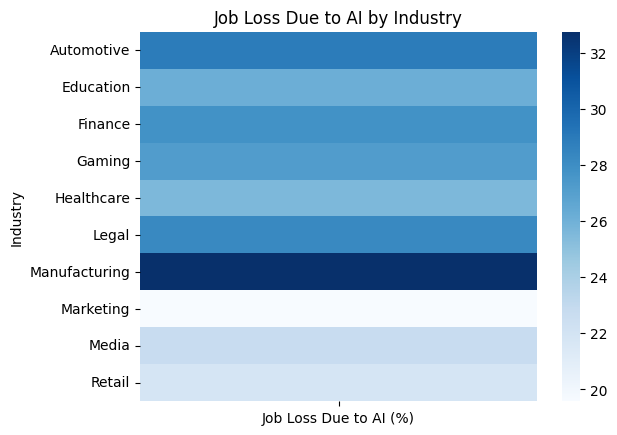

In [ ]:
#d.) Heat Map
pivot_table = pd.pivot_table(df, index='Industry', values='Job Loss Due to AI (%)', aggfunc='mean')
sns.heatmap(pivot_table, cmap='Blues')

plt.ylabel('Industry')
plt.title('Job Loss Due to AI by Industry')
plt.show()


In [ ]:
df.dtypes

,0
Country,object
Year,int64
Industry,object
AI Adoption Rate (%),float64
AI-Generated Content Volume (TBs per year),float64
Job Loss Due to AI (%),float64
Revenue Increase Due to AI (%),float64
Human-AI Collaboration Rate (%),float64
Top AI Tools Used,object
Regulation Status,object


In [ ]:
#11.	Perform the hypothesis test to find the correlation
ai_adoption = df['AI Adoption Rate (%)']
job_loss = df['Job Loss Due to AI (%)']


# Ensure both series have equal length
min_len = min(len(ai_adoption), len(job_loss))
ai_adoption = ai_adoption[:min_len]
job_loss = job_loss[:min_len]

# Calculate Pearson correlation
r_value, p_value = pearsonr(ai_adoption, job_loss)
dfreedom = len(ai_adoption) - 2

# Print results
print(f"Pearson Correlation Coefficient (r): {r_value:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dfreedom}")

# Interpretation
if p_value < 0.05:
    print("\nConclusion: Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a statistically significant correlation between AI Adoption Rate and Job Loss Due to AI.")
else:
    print("\nConclusion: Since the p-value is greater than 0.05, we accept the null hypothesis.")
    print("There is no statistically significant correlation between AI Adoption Rate and Job Loss Due to AI.")

Pearson Correlation Coefficient (r): -0.0046
P-Value: 0.9486
Degrees of Freedom: 198

Conclusion: Since the p-value is greater than 0.05, we accept the null hypothesis.
There is no statistically significant correlation between AI Adoption Rate and Job Loss Due to AI.


In [ ]:
#Spearman


# Preform Spearmans correlation
r, p_value = spearmanr(df['AI Adoption Rate (%)'], df['Job Loss Due to AI (%)'])
df_spearman = len(df) - 2

# Print results
print(f"Spearmans Correlation Test Results:")
print(f"Spearmans Correlation Coefficient (r): {r:4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {df_spearman}")

# Interpretation
if p_value < 0.05:
    print("\nConclusion: Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a statistically significant correlation between AI Adoption Rate and Job Loss Due to AI.")
else:
    print("\nConclusion: Since the p-value is greater than 0.05, we accept the null hypothesis.")
    print("There is no statistically significant correlation between AI Adoption Rate and Job Loss Due to AI.")

Spearmans Correlation Test Results:
Spearmans Correlation Coefficient (r): -0.001088
P-Value: 0.9878
Degrees of Freedom: 198

Conclusion: Since the p-value is greater than 0.05, we accept the null hypothesis.
There is no statistically significant correlation between AI Adoption Rate and Job Loss Due to AI.


In [ ]:
#12. Implementation of the T-test
stat, pvalue = ttest_1samp(sample['Job Loss Due to AI (%)'], 25.788249999999998)

# Display results
print(f't-test Statistic:  {stat}')
print(f'P-value: {pvalue}')

# Interpretation based on p-value
alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis, the average Job Loss due to AI (%) is NOT equal to 25.788249999999998')
else:
    print('Accept the null hypothesis, the average Job Loss due to AI (%) is equal to 25.788249999999998')


t-test Statistic:  -0.0904842532786595
P-value: 0.9280239302879983
Accept the null hypothesis, the average Job Loss due to AI (%) is equal to 25.788249999999998


In [ ]:
#14.	Develop a script to forecast the value of the dependent variable from all the relevant independent variables using Multiple Linear Regression


In [ ]:
#15.	Predict the value of the dependent variable from the different classifier
#Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# First convert continuous Job Loss % to ordinal categories
def job_loss_new(value):
    if value < 25:
        return 'Low'
    else:
        return 'High'

df['JobLoss_Ordinal'] = df['Job Loss Due to AI (%)'].apply(job_loss_new)

# Map ordinal categories to numerical ranks
jobloss_ranking = {'Low': 1, 'High': 2}
df['JobLoss_Label'] = df['JobLoss_Ordinal'].map(jobloss_ranking)


#Select independent and dependent variables
X = df[['AI Adoption Rate (%)']].values

y = df['JobLoss_Label'].values



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
print(X_test)

[[76.22]
 [41.28]
 [16.79]
 [70.59]
 [40.8 ]
 [45.35]
 [27.95]
 [78.95]
 [32.74]
 [72.59]
 [18.43]
 [62.98]
 [39.04]
 [88.38]
 [35.83]
 [77.96]
 [21.63]
 [74.81]
 [33.91]
 [28.27]
 [30.94]
 [43.85]
 [26.63]
 [76.22]
 [28.48]
 [54.67]
 [44.61]
 [42.53]
 [81.86]
 [87.95]
 [83.4 ]
 [34.27]
 [29.61]
 [59.85]
 [43.32]
 [38.21]
 [11.14]
 [78.6 ]
 [78.21]
 [88.16]]


In [ ]:
print(y_test)

[2 1 2 1 1 2 2 1 1 2 1 2 2 1 2 1 2 1 1 1 2 2 2 1 1 2 2 1 2 1 1 2 1 2 1 2 2
 1 1 1]


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Training the logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Get the confusion matrix and the accuracy score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print("confusion matrix:\n", cm)
print("accuracy:", ac)


confusion matrix:
 [[ 6 15]
 [ 7 12]]
accuracy: 0.45
